# Procesado de Datos

Year 2000

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%run -i ../tools/functions.py
%run -i ../tools/label_encoder.py

Charge the file with the data, into a DataFrame

In [12]:
data_2000 = pd.read_csv("../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/SB11-20001-RGSTRO-CLFCCN-V1-0.txt", delimiter="|",
                        encoding="iso-8859-1")

/usr/local/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5,12,14,15,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
data_2000.shape

(77626, 57)

In [ ]:
data_2000.head(3).T

In [14]:
print(data_2000['FAMI_PERSONAS_HOGAR'].value_counts().sort_index().index)
print(data_2000['FAMI_PERSONAS_HOGAR'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_PERSONAS_HOGAR']))

Index(['1', '2', '3', '5', '6', '7', '8', '9', '@'], dtype='object')
1      274
2     2744
3     8917
5    18814
6    11487
7     6493
8     3781
9     2208
@    19122
Name: FAMI_PERSONAS_HOGAR, dtype: int64
Elementos null/NaN 3786
__________________
Elementos diferentes de null/NaN: 73840
__________________
(73840,)
None


The simbol "@" will be changed for the number 4, because the average in Colombian's homes is near to 4.

In [15]:
data_2000['FAMI_PERSONAS_HOGAR'] = data_2000['FAMI_PERSONAS_HOGAR'].replace('@', '4')

According to **DANE** in [ENCUESTA NACIONAL DE CALIDAD DE VIDA](https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/calidad-de-vida-ecv), the average of people per home in colombia, along the last years was between 3 or 4...
With this, i can decide to distribute the NaN elements between the known categories according to the proportions that represents each one.

<Container object of 9 artists>

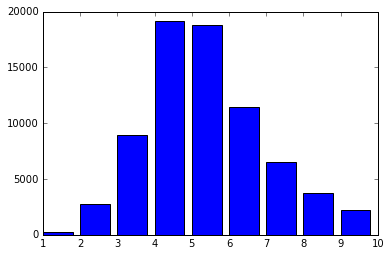

In [16]:
labels = data_2000['FAMI_PERSONAS_HOGAR'].value_counts().sort_index().index
heights = data_2000['FAMI_PERSONAS_HOGAR'].value_counts().sort_index().values
plt.bar(labels, heights)

In [17]:
"""Now i can save the obtained proportion into a list"""
p = []
for i, j in enumerate(data_2000['FAMI_PERSONAS_HOGAR'].value_counts().sort_index().values, 1):
    p.append((j)/data_2000.shape[0])
"""And here, i can save the amount of students that will be taken for every class of the list"""
T = data_2000['FAMI_PERSONAS_HOGAR'].isnull().sum()
for i in range(len(p)):
    p[i] = round(p[i]*T)

In [18]:
#here i have to call the corresponding function
data_2000 = resample_NaN(data_2000, 'FAMI_PERSONAS_HOGAR', p)

cant null 3786
1
2
3
4
5
6
7
8
9
cant null despues: 184


Then, the following columns will be reviewed

In [19]:
print(data_2000['FAMI_VIVIENDA_PROPIA'].value_counts().sort_index().index)
print(data_2000['FAMI_VIVIENDA_PROPIA'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_VIVIENDA_PROPIA']))

Index(['@', 'N', 'S'], dtype='object')
@        4
N    20144
S    53182
Name: FAMI_VIVIENDA_PROPIA, dtype: int64
Elementos null/NaN 4296
__________________
Elementos diferentes de null/NaN: 73330
__________________
(73330,)
None


There are very few rows with the value "@", so the rows that has it will be replaced for 'NaN' values, and the np.nan values too. 

In [20]:
data_2000['FAMI_VIVIENDA_PROPIA'] = data_2000['FAMI_VIVIENDA_PROPIA'].replace('@', np.nan)

And now i have to decide what to do with that nan's  
<span style='color: red'>AQUI VOY!!!!!!!!!!</span>

In [ ]:
print(data_2000['FAMI_DEUDA_VIVIENDA'].value_counts().sort_index().index)
print(data_2000['FAMI_DEUDA_VIVIENDA'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_DEUDA_VIVIENDA']))

In [ ]:
data_2000['FAMI_DEUDA_VIVIENDA'] = data_2000['FAMI_DEUDA_VIVIENDA'].replace('@', np.nan)

In [ ]:
print(data_2000['FAMI_LEE_ESCRIBE_PADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_LEE_ESCRIBE_PADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_LEE_ESCRIBE_PADRE']))

In [ ]:
data_2000['FAMI_LEE_ESCRIBE_PADRE'] = data_2000['FAMI_LEE_ESCRIBE_PADRE'].replace('@', np.nan)

In [ ]:
print(data_2000['FAMI_LEE_ESCRIBE_MADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_LEE_ESCRIBE_MADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_LEE_ESCRIBE_MADRE']))

In [ ]:
data_2000['FAMI_LEE_ESCRIBE_MADRE'] = data_2000['FAMI_LEE_ESCRIBE_MADRE'].replace('@', np.nan)

In [ ]:
print(data_2000['FAMI_SOST_PERSONAL'].value_counts().sort_index().index)
print(data_2000['FAMI_SOST_PERSONAL'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_SOST_PERSONAL']))

In [ ]:
data_2000['FAMI_SOST_PERSONAL'] = data_2000['FAMI_SOST_PERSONAL'].replace('@', np.nan)

In [ ]:
print(data_2000['ESTU_TRABAJA'].value_counts().sort_index().index)
print(data_2000['ESTU_TRABAJA'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_TRABAJA']))

In [ ]:
data_2000['ESTU_TRABAJA'] = data_2000['ESTU_TRABAJA'].replace('@', np.nan)

In [ ]:
print(data_2000['COLE_CALENDARIO'].value_counts().sort_index().index)
print(data_2000['COLE_CALENDARIO'].value_counts().sort_index())
print(missing_data(data_2000['COLE_CALENDARIO']))

In [ ]:
print(data_2000['COLE_CARACTER'].value_counts().sort_index().index)
print(data_2000['COLE_CARACTER'].value_counts().sort_index())
print(missing_data(data_2000['COLE_CARACTER']))

In [ ]:
remaining_c = data_2000.columns.difference(['FAMI_PERSONAS_HOGAR', 'FAMI_VIVIENDA_PROPIA', 'FAMI_DEUDA_VIVIENDA', 'FAMI_LEE_ESCRIBE_PADRE',
                     'FAMI_LEE_ESCRIBE_MADRE', 'FAMI_SOST_PERSONAL', 'ESTU_TRABAJA', 'COLE_CALENDARIO',
                     'COLE_CARACTER'])

In [ ]:
remaining_c

Cambio de la @ por 4 en la columna *ESTU_ACT_PROX_ANNO*

In [ ]:
print(data_2000['COLE_DEPTO_UBICACION'].value_counts().sort_index().index)
print(data_2000['COLE_DEPTO_UBICACION'].value_counts().sort_index())
print(missing_data(data_2000['COLE_DEPTO_UBICACION']))

In [ ]:
data_2000['COLE_DEPTO_UBICACION'] = data_2000['COLE_DEPTO_UBICACION'].replace('NARI\x84O', 'NARIÑO')

In [ ]:
print(data_2000['ESTU_DEPTO_PRESENTACION'].value_counts().sort_index().index)
print(data_2000['ESTU_DEPTO_PRESENTACION'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_DEPTO_PRESENTACION']))

In [ ]:
data_2000['ESTU_DEPTO_PRESENTACION'] = data_2000['ESTU_DEPTO_PRESENTACION'].replace('NARI\x84O', 'NARIÑO')

In [ ]:
print(data_2000['ESTU_ACT_PROX_ANNO'].value_counts().sort_index().index)
print(data_2000['ESTU_ACT_PROX_ANNO'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_ACT_PROX_ANNO']))

In [ ]:
"""The simbol @ will be replaced for the number(string) 4."""
data_2000['ESTU_ACT_PROX_ANNO'] = data_2000['ESTU_ACT_PROX_ANNO'].replace('@', '4')

Se eliminan las lineas que tienen años invalidos

In [ ]:
print(data_2000['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index().index)
print(data_2000['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_NACIMIENTO_ANNO']))

In [ ]:
for i in data_2000['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index().index:
    if len(str(i))<4:
        data_2000['ESTU_NACIMIENTO_ANNO'] = data_2000['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)

Se hacen los cambios segun la columna FAMI_APORTANTES

In [ ]:
print(data_2000['FAMI_APORTANTES'].value_counts().sort_index().index)
print(data_2000['FAMI_APORTANTES'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_APORTANTES']))

In [ ]:
data_2000['FAMI_APORTANTES'] = data_2000['FAMI_APORTANTES'].replace('@', np.nan)
data_2000['FAMI_APORTANTES'] = data_2000['FAMI_APORTANTES'].replace('+', '+9')

Se eliminan las filas que poseen '@' FAMI_EDUCA_MADRE

In [ ]:
print(data_2000['FAMI_EDUCA_MADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_EDUCA_MADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_EDUCA_MADRE']))

In [ ]:
data_2000['FAMI_EDUCA_MADRE'] = data_2000['FAMI_EDUCA_MADRE'].replace('@', np.nan)

Se eliminan las filas que poseen '@' en FAMI_EDUCA_PADRE

In [ ]:
print(data_2000['FAMI_EDUCA_PADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_EDUCA_PADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_EDUCA_PADRE']))

In [ ]:
data_2000['FAMI_EDUCA_PADRE'] = data_2000['FAMI_EDUCA_PADRE'].replace('@', np.nan)

In [ ]:
print(data_2000['FAMI_INGRESO_FMILIAR_MENSUAL'].value_counts().sort_index().index)
print(data_2000['FAMI_INGRESO_FMILIAR_MENSUAL'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_INGRESO_FMILIAR_MENSUAL']))

In [ ]:
data_2000['FAMI_INGRESO_FMILIAR_MENSUAL'] = data_2000['FAMI_INGRESO_FMILIAR_MENSUAL'].replace('@', np.nan)

In [ ]:
print(data_2000['FAMI_NUM_HERMANOS'].value_counts().sort_index().index)
print(data_2000['FAMI_NUM_HERMANOS'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_NUM_HERMANOS']))

In [ ]:
data_2000['FAMI_NUM_HERMANOS'] = data_2000['FAMI_NUM_HERMANOS'].replace('+', '+9')
data_2000['FAMI_NUM_HERMANOS'] = data_2000['FAMI_NUM_HERMANOS'].replace('@', np.nan)

In [ ]:
print(data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'].value_counts().sort_index().index)
print(data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR']))

In [ ]:
#lo mismo que la anterior pero en FAMI_NUM_HERMANOS_EDUSUPERIOR
data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'] = data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'].replace('+', '+9')
data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'] = data_2000['FAMI_NUM_HERMANOS_EDUSUPERIOR'].replace('@', np.nan)

In [ ]:
print(data_2000['FAMI_OCUPA_MADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_OCUPA_MADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_OCUPA_MADRE']))

In [ ]:
#se eliminan las filas que poseen el valor '@'
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('0', '00')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('@', np.nan)

In [ ]:
print(data_2000['FAMI_OCUPA_PADRE'].value_counts().sort_index().index)
print(data_2000['FAMI_OCUPA_PADRE'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_OCUPA_PADRE']))

In [ ]:
#se eliminan las filas que poseen el valor '@'
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('0', '00')
data_2000['FAMI_OCUPA_MADRE'] = data_2000['FAMI_OCUPA_MADRE'].replace('@', np.nan)

In [ ]:
print(data_2000['FAMI_POSICION_HERMANOS'].value_counts().sort_index().index)
print(data_2000['FAMI_POSICION_HERMANOS'].value_counts().sort_index())
print(missing_data(data_2000['FAMI_POSICION_HERMANOS']))

In [ ]:
#Se eliminan las filas que tienen valores '@' y se cambia '+' por '+10'
data_2000['FAMI_POSICION_HERMANOS'] = data_2000['FAMI_POSICION_HERMANOS'].replace('+', '+9')
data_2000['FAMI_POSICION_HERMANOS'] = data_2000['FAMI_POSICION_HERMANOS'].replace('@', np.nan)

Now i can change the Problematic columns

In [ ]:
print(data_2000['ESTU_CARRDESEADA_COD'].value_counts().sort_index().index)
print(data_2000['ESTU_CARRDESEADA_COD'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_CARRDESEADA_COD']))

In [ ]:
"""Here i'm replacing the values with anomalies for NaN, and i will let the rows that has got any number because the 
codes of the programs are so diverse. And then i will put NaN where the values has some space or np.nan"""
for i in data_2000['ESTU_CARRDESEADA_COD'].value_counts().sort_index().index:
    if '@' in i:
        data_2000['ESTU_CARRDESEADA_COD'] = data_2000['ESTU_CARRDESEADA_COD'].replace(i, np.nan)
    elif ' ' in i:
        data_2000['ESTU_CARRDESEADA_COD'] = data_2000['ESTU_CARRDESEADA_COD'].replace(i, np.nan)
    elif int(i)==0:
        data_2000['ESTU_CARRDESEADA_COD'] = data_2000['ESTU_CARRDESEADA_COD'].replace(i, np.nan)

In [ ]:
print(data_2000['ESTU_IES_COD_DESEADA'].value_counts().sort_index().index)
print(data_2000['ESTU_IES_COD_DESEADA'].value_counts().sort_index())
print(missing_data(data_2000['ESTU_IES_COD_DESEADA']))

In [ ]:
for i in data_2000['ESTU_IES_COD_DESEADA'].value_counts().sort_index().index:
    if '@' in i:
        data_2000['ESTU_IES_COD_DESEADA'] = data_2000['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif ' ' in i:
        data_2000['ESTU_IES_COD_DESEADA'] = data_2000['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif int(i)==0:
        data_2000['ESTU_IES_COD_DESEADA'] = data_2000['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif len(i)<4:
        data_2000['ESTU_IES_COD_DESEADA'] = data_2000['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif len(i)>4:
        data_2000['ESTU_IES_COD_DESEADA'] = data_2000['ESTU_IES_COD_DESEADA'].replace(i, np.nan)

In [ ]:
print(data_2000['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index().index)
print(data_2000['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index())
print(missing_data(data_2000['IND_ANNO_TERMINO_BACHILLERATO']))

In [ ]:
for i in data_2000['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index().index:
    if '@' in i:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif '*' in i:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif ' ' in i:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif int(i)==0:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif len(i)<4:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif len(i)>4:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif int(i)>2002:
        data_2000['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)

Deletion of the selected columns

ELIMINACIONES (se eliminan porque se considera que no aportaran nada a la prediccion)

- ESTU_CONSECUTIVO: Eliminada. no aporta para la prediccion ***ELIMINADA***
- ESTU_LIMITA_SORDOINTERPRETE: No tiene valores en ninguna fila, ***ELIMINADA***

In [ ]:
data_2000 = data_2000.drop(['ESTU_LIMITA_SORDOINTERPRETE', 'ESTU_CONSECUTIVO', 'COLE_NOMBRE_SEDE', 'ESTU_TIPO_DOCUMENTO'], axis=1)

## TARGETS

In [ ]:
c = 'PUNT_BIOLOGIA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

In [ ]:
c = 'PUNT_FILOSOFIA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

In [ ]:
c = 'PUNT_FISICA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

In [ ]:
c = 'PUNT_GEOGRAFIA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

In [ ]:
c = 'PUNT_HISTORIA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

In [ ]:
c = 'PUNT_IDIOMA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

In [ ]:
c = 'PUNT_INTERDISCIPLINAR'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

In [ ]:
c = 'PUNT_LENGUAJE'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

In [ ]:
c = 'PUNT_MATEMATICAS'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

In [ ]:
c = 'PUNT_QUIMICA'
print(data_2000[c].value_counts().sort_index().index)
print(data_2000[c].value_counts().sort_index())
print(missing_data(data_2000[c]))

___________

___________

___________

# The second file is the 2000_2 that correspond to the second period of the year.

In [ ]:
data_2000_2 = pd.read_csv("../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/SB11-20002-RGSTRO-CLFCCN-V1-0.txt", delimiter="|",
                         encoding="iso-8859-1")

In [ ]:
data_2000_2.shape

In [ ]:
data_2000_2.head(3).T

The first thing i want to do is delete the columns that does not contribute to the task

The columns that does not contribute to the task are:
- ESTU_CONSECUTIVO
- COLE_NOMBRE_SEDE
- ESTU_TIPO_DOCUMENTO

In [ ]:
data_2000_2 = data_2000_2.drop(['ESTU_CONSECUTIVO', 'COLE_NOMBRE_SEDE', 'ESTU_TIPO_DOCUMENTO'], axis=1)

Now i can check the other columns to delete the lines that has strange characters and to decide what to do with the NaN values

In [ ]:
data_2000_2.columns

In [ ]:
"""all ok"""
print(data_2000_2['COLE_COD_ICFES'].value_counts().sort_index().index)
print(data_2000_2['COLE_COD_ICFES'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_COD_ICFES']))

In [ ]:
"""There are some years that are not valid, so this lines will be deleted"""
print(data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index().index)
print(data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index())
print(missing_data(data_2000_2['IND_ANNO_TERMINO_BACHILLERATO']))

In [ ]:
for i in data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].value_counts().sort_index().index:
    if "*" in i:
        data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif (' ' in i):
        data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif (len(i)<4):
        data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)
    elif (int(i) > 2002):
        data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'] = data_2000_2['IND_ANNO_TERMINO_BACHILLERATO'].replace(i, np.nan)

In [ ]:
"""This columns looks good"""
print(data_2000_2['COLE_JORNADA'].value_counts().sort_index().index)
print(data_2000_2['COLE_JORNADA'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_JORNADA']))

In [ ]:
"""Obtained an error, this happens because of the combination of strings a numbers in just one column, so
i decide to do a first treatment"""
print(data_2000_2['COLE_VALOR_PENSION'].value_counts().index)
print(data_2000_2['COLE_VALOR_PENSION'].value_counts())
print(missing_data(data_2000_2['COLE_VALOR_PENSION']))

In [ ]:
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(1.0, '1')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(2.0, '2')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(3.0, '3')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(4.0, '4')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(5.0, '5')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(6.0, '6')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(7.0, '7')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace(8.0, '8')
data_2000_2['COLE_VALOR_PENSION'] = data_2000_2['COLE_VALOR_PENSION'].replace('*', np.nan)

__________

In [ ]:
"""This column is ok"""
print(data_2000_2['ESTU_GENERO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_GENERO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_GENERO']))

In [ ]:
"""I get errors with this column"""
print(data_2000_2['ESTU_NACIMIENTO_DIA'].value_counts().index)
print(data_2000_2['ESTU_NACIMIENTO_DIA'].value_counts())
print(missing_data(data_2000_2['ESTU_NACIMIENTO_DIA']))

In [ ]:
"""The First step is replace the incoherences for np.nan values"""
for i in data_2000_2['ESTU_NACIMIENTO_DIA'].value_counts().index:
    if '*' in str(i):
        data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(i, np.nan)
    elif(int(i)>31):
        data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(i, np.nan)
    elif(int(i) == 0):
        data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(i, np.nan)

In [ ]:
"""Now it's time to replace the number values for string values"""
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(1.0, '01')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(2.0, '02')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(3.0, '03')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(4.0, '04')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(5.0, '05')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(6.0, '06')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(7.0, '07')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(8.0, '08')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(9.0, '09')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(10.0, '10')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(11.0, '11')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(12.0, '12')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(13.0, '13')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(14.0, '14')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(15.0, '15')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(16.0, '16')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(17.0, '17')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(18.0, '18')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(19.0, '19')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(20.0, '20')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(21.0, '21')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(22.0, '22')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(23.0, '23')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(24.0, '24')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(25.0, '25')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(26.0, '26')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(27.0, '27')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(28.0, '28')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(29.0, '29')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(30.0, '30')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace(31.0, '31')

"""And Finally a change some values to left everything in just one way"""
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('1', '01')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('5', '05')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('3', '03')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('7', '07')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('4', '04')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('6', '06')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('8', '08')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('2', '02')
data_2000_2['ESTU_NACIMIENTO_DIA'] = data_2000_2['ESTU_NACIMIENTO_DIA'].replace('9', '09')

___

In [ ]:
"""This column is OK, in this column exist 1078 np.nan, but as they are numpy dtype, i will let this column like it's
in this moment"""
print(data_2000_2['ESTU_NACIMIENTO_MES'].value_counts().sort_index().index)
print(data_2000_2['ESTU_NACIMIENTO_MES'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_NACIMIENTO_MES']))

In [ ]:
"""This column present A LOT of incoherences."""
print(data_2000_2['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_NACIMIENTO_ANNO']))

In [ ]:
"""So, the first thing i have to do is replace the incoherent values with a string NaN"""
for i in data_2000_2['ESTU_NACIMIENTO_ANNO'].value_counts().sort_index().index:
    if '*' in i:
        data_2000_2['ESTU_NACIMIENTO_ANNO'] = data_2000_2['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)
    elif(' ' in i):
        data_2000_2['ESTU_NACIMIENTO_ANNO'] = data_2000_2['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)
    elif(len(i)<4):
        data_2000_2['ESTU_NACIMIENTO_ANNO'] = data_2000_2['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)
    elif(int(i)>2002):
        data_2000_2['ESTU_NACIMIENTO_ANNO'] = data_2000_2['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)
    elif(int(i)<1900):
        data_2000_2['ESTU_NACIMIENTO_ANNO'] = data_2000_2['ESTU_NACIMIENTO_ANNO'].replace(i, np.nan)

In [ ]:
"""This Column looks OK, just has one np.nan value, that i will replace immediately."""
print(data_2000_2['ESTU_DEPTO_PRESENTACION'].value_counts().sort_index().index)
print(data_2000_2['ESTU_DEPTO_PRESENTACION'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_DEPTO_PRESENTACION']))

In [ ]:
"""Checked. Looks OK, but has one np.nan value that will be replaced immediately"""
print(data_2000_2['ESTU_MCPIO_PRESENTACION'].value_counts().sort_index().index)
print(data_2000_2['ESTU_MCPIO_PRESENTACION'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_MCPIO_PRESENTACION']))

In [ ]:
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('1', '01')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('2', '02')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('3', '03')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('4', '04')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('5', '05')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('6', '06')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('7', '07')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('8', '08')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('9', '09')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(99.0, '99')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(1.0, '01')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(2.0, '02')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(3.0, '03')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(4.0, '04')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(5.0, '05')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(6.0, '06')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(7.0, '07')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(8.0, '08')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace(9.0, '09')
data_2000_2['ESTU_ETNIA'] = data_2000_2['ESTU_ETNIA'].replace('*', np.nan)

"""And now it's ready"""

In [ ]:
"""Even if this column has to many NaN values, is OK, in the encode process that NaN values will be -1"""
print(data_2000_2['ESTU_LIMITA_INVIDENTE'].value_counts().sort_index().index)
print(data_2000_2['ESTU_LIMITA_INVIDENTE'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_LIMITA_INVIDENTE']))

In [ ]:
"""This column does not have any row with a value so this column will be deleted."""
print(data_2000_2['ESTU_LIMITA_SORDOINTERPRETE'].value_counts().sort_index().index)
print(data_2000_2['ESTU_LIMITA_SORDOINTERPRETE'].value_counts().sort_index())

In [ ]:
"""Deleting..."""
data_2000_2.drop('ESTU_LIMITA_SORDOINTERPRETE', axis=1, inplace=True)
"""Deleted"""

In [ ]:
"""Even if this column has to many NaN values, is OK, in the encode process that NaN values will be -1"""
print(data_2000_2['ESTU_LIMITA_SORDONOINTERPRETE'].value_counts().sort_index().index)
print(data_2000_2['ESTU_LIMITA_SORDONOINTERPRETE'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_LIMITA_SORDONOINTERPRETE']))

In [ ]:
"""Even if this column has to many NaN values, is OK, in the encode process that NaN values will be -1"""
print(data_2000_2['ESTU_LIMITA_MOTRIZ'].value_counts().sort_index().index)
print(data_2000_2['ESTU_LIMITA_MOTRIZ'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_LIMITA_MOTRIZ']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_BIOLOGIA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_BIOLOGIA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_BIOLOGIA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_FILOSOFIA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_FILOSOFIA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_FILOSOFIA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_FISICA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_FISICA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_FISICA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_HISTORIA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_HISTORIA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_HISTORIA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_QUIMICA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_QUIMICA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_QUIMICA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_LENGUAJE'].value_counts().sort_index().index)
print(data_2000_2['PUNT_LENGUAJE'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_LENGUAJE']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_GEOGRAFIA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_GEOGRAFIA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_GEOGRAFIA']))

In [ ]:
"""This column Looks OK"""
print(data_2000_2['COD_INTERDISCIPLINAR'].value_counts().sort_index().index)
print(data_2000_2['COD_INTERDISCIPLINAR'].value_counts().sort_index())
print(missing_data(data_2000_2['COD_INTERDISCIPLINAR']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_INTERDISCIPLINAR'].value_counts().sort_index().index)
print(data_2000_2['PUNT_INTERDISCIPLINAR'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_INTERDISCIPLINAR']))

In [ ]:
"""This column loooks OK"""
print(data_2000_2['COD_IDIOMA'].value_counts().sort_index().index)
print(data_2000_2['COD_IDIOMA'].value_counts().sort_index())
print(missing_data(data_2000_2['COD_IDIOMA']))

In [ ]:
"""TARGET: Looks OK"""
print(data_2000_2['PUNT_IDIOMA'].value_counts().sort_index().index)
print(data_2000_2['PUNT_IDIOMA'].value_counts().sort_index())
print(missing_data(data_2000_2['PUNT_IDIOMA']))

In [ ]:
"""This column has a lot of incoherences, this incoherences will be replaced for NaN"""
print(data_2000_2['ESTU_IES_COD_DESEADA'].value_counts().sort_index().index)
print(data_2000_2['ESTU_IES_COD_DESEADA'].value_counts().sort_index())

In [ ]:
"""The codes of the universities are of 4 digits, so i will replace the codes that has some '*', or space (' '), or that has more
or less than 4 digits"""
for i in data_2000_2['ESTU_IES_COD_DESEADA'].value_counts().sort_index().index:
    if '*' in i:
        data_2000_2['ESTU_IES_COD_DESEADA'] = data_2000_2['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif ' ' in i:
        data_2000_2['ESTU_IES_COD_DESEADA'] = data_2000_2['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif len(i)<4:
        data_2000_2['ESTU_IES_COD_DESEADA'] = data_2000_2['ESTU_IES_COD_DESEADA'].replace(i, np.nan)
    elif len(i)>4:
        data_2000_2['ESTU_IES_COD_DESEADA'] = data_2000_2['ESTU_IES_COD_DESEADA'].replace(i, np.nan)

In [ ]:
"""Looks OK, just replace the * values for np.nan"""
print(data_2000_2['ESTU_RAZONINSTITUTO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_RAZONINSTITUTO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_RAZONINSTITUTO']))

In [ ]:
"""Will be replace for '*' values"""
data_2000_2['ESTU_RAZONINSTITUTO'] = data_2000_2['ESTU_RAZONINSTITUTO'].replace('*', np.nan)

In [ ]:
"""Into this column i found a LOT of incoherences."""
print(data_2000_2['ESTU_CARRDESEADA_COD'].value_counts().sort_index().index)
print(data_2000_2['ESTU_CARRDESEADA_COD'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_CARRDESEADA_COD']))

In [ ]:
"""Here i'm replacing the values with anomalies for NaN, and i will let the rows that has got any number because the 
codes of the programs are so diverse. And then i will put NaN where the values has some space or np.nan"""
for i in data_2000_2['ESTU_CARRDESEADA_COD'].value_counts().sort_index().index:
    if '*' in i:
        data_2000_2['ESTU_CARRDESEADA_COD'] = data_2000_2['ESTU_CARRDESEADA_COD'].replace(i, np.nan)
    elif(' ' in i):
        data_2000_2['ESTU_CARRDESEADA_COD'] = data_2000_2['ESTU_CARRDESEADA_COD'].replace(i, np.nan)
    #And i decided to replace the code 0 or 00... for 'NaN' because there is no program with that code
    elif int(i)==0:
        data_2000_2['ESTU_CARRDESEADA_COD'] = data_2000_2['ESTU_CARRDESEADA_COD'].replace(i, np.nan)

In [ ]:
"""In this column i found just an incoherence with the * values"""
print(data_2000_2['ESTU_CARRDESEADA_RAZON'].value_counts().sort_index().index)
print(data_2000_2['ESTU_CARRDESEADA_RAZON'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_CARRDESEADA_RAZON']))

In [ ]:
"""The changes are done here."""
data_2000_2['ESTU_CARRDESEADA_RAZON'] = data_2000_2['ESTU_CARRDESEADA_RAZON'].replace('*', np.nan)

In [ ]:
"""Incoherences with the * and the + values. I decide to let the + values as +9 human being in home,
and the * as NaN"""
print(data_2000_2['FAMI_PERSONAS_HOGAR'].value_counts().sort_index().index)
print(data_2000_2['FAMI_PERSONAS_HOGAR'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_PERSONAS_HOGAR']))

In [ ]:
data_2000_2['FAMI_PERSONAS_HOGAR'] = data_2000_2['FAMI_PERSONAS_HOGAR'].replace('*', np.nan)
data_2000_2['FAMI_PERSONAS_HOGAR'] = data_2000_2['FAMI_PERSONAS_HOGAR'].replace('+', '+9')

In [ ]:
"""Has got some * values, this values will be replaced for NaN"""
print(data_2000_2['FAMI_VIVIENDA_PROPIA'].value_counts().sort_index().index)
print(data_2000_2['FAMI_VIVIENDA_PROPIA'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_VIVIENDA_PROPIA']))

In [ ]:
data_2000_2['FAMI_VIVIENDA_PROPIA'] = data_2000_2['FAMI_VIVIENDA_PROPIA'].replace('*', np.nan)

In [ ]:
"""This column must be like a boolean, with just two values (S/N) but it has four different values, so i decided to
replace the * values for NaN, and replace the 1 for S, and the 2 for N because of the amounts,"""
print(data_2000_2['FAMI_DEUDA_VIVIENDA'].value_counts().sort_index().index)
print(data_2000_2['FAMI_DEUDA_VIVIENDA'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_DEUDA_VIVIENDA']))

In [ ]:
data_2000_2['FAMI_DEUDA_VIVIENDA'] = data_2000_2['FAMI_DEUDA_VIVIENDA'].replace('*', np.nan)
data_2000_2['FAMI_DEUDA_VIVIENDA'] = data_2000_2['FAMI_DEUDA_VIVIENDA'].replace('1', 'S')
data_2000_2['FAMI_DEUDA_VIVIENDA'] = data_2000_2['FAMI_DEUDA_VIVIENDA'].replace('2', 'N')

In [ ]:
"""I really don't know what means the 0..."""
print(data_2000_2['FAMI_APORTANTES'].value_counts().sort_index().index)
print(data_2000_2['FAMI_APORTANTES'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_APORTANTES']))

In [ ]:
"""The 0 counts, so i will replace the simbol + for '+9' and '*' for 'NaN'"""
data_2000_2['FAMI_APORTANTES'] = data_2000_2['FAMI_APORTANTES'].replace('+', '+9')
data_2000_2['FAMI_APORTANTES'] = data_2000_2['FAMI_APORTANTES'].replace('*', np.nan)

In [ ]:
"""In this column there is some '*' that will be replaced for 'NaN' and the np.nan too"""
print(data_2000_2['FAMI_INGRESO_FMILIAR_MENSUAL'].value_counts().sort_index().index)
print(data_2000_2['FAMI_INGRESO_FMILIAR_MENSUAL'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_INGRESO_FMILIAR_MENSUAL']))

In [ ]:
data_2000_2['FAMI_APORTANTES'] = data_2000_2['FAMI_APORTANTES'].replace('*', np.nan)

In [ ]:
"""Here the '*' will be replaced for 'NaN' and the np.nan too"""
print(data_2000_2['FAMI_LEE_ESCRIBE_PADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_LEE_ESCRIBE_PADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_LEE_ESCRIBE_PADRE']))

In [ ]:
data_2000_2['FAMI_LEE_ESCRIBE_PADRE'] = data_2000_2['FAMI_LEE_ESCRIBE_PADRE'].replace('*', np.nan)

In [ ]:
"""Here the '*' will be replaced for 'NaN' and the np.nan too"""
print(data_2000_2['FAMI_LEE_ESCRIBE_MADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_LEE_ESCRIBE_MADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_LEE_ESCRIBE_MADRE']))

In [ ]:
data_2000_2['FAMI_LEE_ESCRIBE_PADRE'] = data_2000_2['FAMI_LEE_ESCRIBE_PADRE'].replace('*', np.nan)

In [ ]:
"""Here the same treatment, but the 9 will be replaced for 'NaN' too"""
print(data_2000_2['FAMI_EDUCA_PADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_EDUCA_PADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_EDUCA_PADRE']))

In [ ]:
data_2000_2['FAMI_EDUCA_PADRE'] = data_2000_2['FAMI_EDUCA_PADRE'].replace('9', np.nan)
data_2000_2['FAMI_EDUCA_PADRE'] = data_2000_2['FAMI_EDUCA_PADRE'].replace('*', np.nan)

In [ ]:
"""The same treatment"""
print(data_2000_2['FAMI_EDUCA_MADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_EDUCA_MADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_EDUCA_MADRE']))

In [ ]:
data_2000_2['FAMI_EDUCA_MADRE'] = data_2000_2['FAMI_EDUCA_MADRE'].replace('*', np.nan)

In [ ]:
"""The '*' will be replaced for 'NaN' and the number with just 1 character will be replaced for themselves but with 
one 0 before (ex: 3->03)"""
print(data_2000_2['FAMI_OCUPA_PADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_OCUPA_PADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_OCUPA_PADRE']))

In [ ]:
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('0', '00')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('2', '02')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('3', '03')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('5', '05')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('6', '06')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('8', '08')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('9', '09')
data_2000_2['FAMI_OCUPA_PADRE'] = data_2000_2['FAMI_OCUPA_PADRE'].replace('*', np.nan)

In [ ]:
"""Same treatment that the last one"""
print(data_2000_2['FAMI_OCUPA_MADRE'].value_counts().sort_index().index)
print(data_2000_2['FAMI_OCUPA_MADRE'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_OCUPA_MADRE']))

In [ ]:
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('0', '00')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('1', '01')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('2', '02')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('5', '05')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('6', '06')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('8', '08')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('9', '09')
data_2000_2['FAMI_OCUPA_MADRE'] = data_2000_2['FAMI_OCUPA_MADRE'].replace('*', np.nan)

In [ ]:
"""The simbol '+' will be replaced for '+9' and the '*' and the np.nan will be replaced for 'NaN'."""
print(data_2000_2['FAMI_NUM_HERMANOS'].value_counts().sort_index().index)
print(data_2000_2['FAMI_NUM_HERMANOS'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_NUM_HERMANOS']))

In [ ]:
data_2000_2['FAMI_NUM_HERMANOS'] = data_2000_2['FAMI_NUM_HERMANOS'].replace('+', '+9')
data_2000_2['FAMI_NUM_HERMANOS'] = data_2000_2['FAMI_NUM_HERMANOS'].replace('*', np.nan)

In [ ]:
"""The same that the last one"""
print(data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'].value_counts().sort_index().index)
print(data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR']))

In [ ]:
data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'] = data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'].replace('+', '+9')
data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'] = data_2000_2['FAMI_NUM_HERMANOS_EDUSUPERIOR'].replace('*', np.nan)

In [ ]:
"""The same that the last one"""
print(data_2000_2['FAMI_POSICION_HERMANOS'].value_counts().sort_index().index)
print(data_2000_2['FAMI_POSICION_HERMANOS'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_POSICION_HERMANOS']))

In [ ]:
data_2000_2['FAMI_POSICION_HERMANOS'] = data_2000_2['FAMI_POSICION_HERMANOS'].replace('+', '+9')
data_2000_2['FAMI_POSICION_HERMANOS'] = data_2000_2['FAMI_POSICION_HERMANOS'].replace('*', np.nan)

In [ ]:
"""Put NaN where '*' or np.nan"""
print(data_2000_2['FAMI_SOST_PERSONAL'].value_counts().sort_index().index)
print(data_2000_2['FAMI_SOST_PERSONAL'].value_counts().sort_index())
print(missing_data(data_2000_2['FAMI_SOST_PERSONAL']))

In [ ]:
data_2000_2['FAMI_SOST_PERSONAL'] = data_2000_2['FAMI_SOST_PERSONAL'].replace('*', np.nan)

In [ ]:
"""The same that the last one"""
print(data_2000_2['ESTU_TRABAJA'].value_counts().sort_index().index)
print(data_2000_2['ESTU_TRABAJA'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_TRABAJA']))

In [ ]:
data_2000_2['ESTU_TRABAJA'] = data_2000_2['ESTU_TRABAJA'].replace('*', np.nan)

In [ ]:
"""The same that the last one"""
print(data_2000_2['ESTU_ACT_PROX_ANNO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_ACT_PROX_ANNO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_ACT_PROX_ANNO']))

In [ ]:
data_2000_2['ESTU_ACT_PROX_ANNO'] = data_2000_2['ESTU_ACT_PROX_ANNO'].replace('*', np.nan)

In [ ]:
"""just change the np.nan value for 'NaN'"""
print(data_2000_2['COLE_CALENDARIO'].value_counts().sort_index().index)
print(data_2000_2['COLE_CALENDARIO'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_CALENDARIO']))

In [ ]:
"""This column will stand like it is at this moment"""
print(data_2000_2['COLE_BILINGUE'].value_counts().sort_index().index)
print(data_2000_2['COLE_BILINGUE'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_BILINGUE']))

In [ ]:
"""Just will change the np.nan value for a 'NaN'"""
print(data_2000_2['COLE_CARACTER'].value_counts().sort_index().index)
print(data_2000_2['COLE_CARACTER'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_CARACTER']))

In [ ]:
"""Just will change the np.nan value for a 'NaN'"""
print(data_2000_2['COLE_DEPTO_UBICACION'].value_counts().sort_index().index)
print(data_2000_2['COLE_DEPTO_UBICACION'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_DEPTO_UBICACION']))

In [ ]:
"""Just chage the np.nan value for a 'NaN'"""
print(data_2000_2['COLE_MCPIO_UBICACION'].value_counts().sort_index().index)
print(data_2000_2['COLE_MCPIO_UBICACION'].value_counts().sort_index())
print(missing_data(data_2000_2['COLE_MCPIO_UBICACION']))

In [ ]:
"""the same that the last one"""
print(data_2000_2['ESTU_RESIDE_DEPTO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_RESIDE_DEPTO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_RESIDE_DEPTO']))

In [ ]:
"""The same that the last one"""
print(data_2000_2['ESTU_RESIDE_MCPIO'].value_counts().sort_index().index)
print(data_2000_2['ESTU_RESIDE_MCPIO'].value_counts().sort_index())
print(missing_data(data_2000_2['ESTU_RESIDE_MCPIO']))

# The Last Step is save the obtained DataFrames as Files

In [ ]:
data_2000.to_csv('../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', sep=';', index = False)
data_2000_2.to_csv('../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_2.csv', sep=';', index = False)